In [1]:
import nltk
from nameparser import HumanName
from nltk import word_tokenize, pos_tag, ne_chunk
import numpy as np

with open('firstname.txt', 'r') as myfile:
  data = myfile.read().replace('\n', '')
with open('Frankenstein.txt', 'r') as myfile:
  book = myfile.read().replace('\n', '')
import re
firstname = re.findall(r'[A-Z]+',data)
firstname.append("PROFESSOR") # to catch professor Snape for Harry Potter

C:\Anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


ModuleNotFoundError: No module named 'nameparser'

In [14]:
def get_human_names(text):
    tokens = nltk.tokenize.word_tokenize(text)
    pos = nltk.pos_tag(tokens)
    sentt = nltk.ne_chunk(pos, binary = False)
    person_list = []
    person = []
    name = ""
    for subtree in sentt.subtrees(filter=lambda t: t.label() == 'PERSON'):       
        for leaf in subtree.leaves():            
            person.append(leaf[0])
        if len(person) > 1: #avoid grabbing lone surnames
            include = False
            for part in person:               
                name += part + ' '
                if part.upper() in firstname:
                    include = True
            if name[:-1] not in person_list and include == True:                
                person_list.append(name[:-1])
                
        elif len(person) == 1:
            person = ''.join(person)
            if person.upper() in firstname:
                person_list.append(person)
        name = ''
        person = []
    
    return set(person_list)

In [15]:
names = get_human_names(book)

In [16]:

names.remove('Man')
names.remove('Elizabeth')
names.remove('Poor Justine')
names.remove('Soon')
print (names)

{'Destiny', 'Cornelius Agrippa', 'Daniel', 'Andrew', 'Margaret', 'Adam', 'John Melbourne', 'Mary Wollstonecraft', 'Tintern Abbey', 'Summer', 'Daniel Nugent', 'Henry Clerval', 'Bernard', 'Autumn', 'Felix', 'Henry', 'Dear Victor', 'Caroline', 'Arthur', 'Milton', 'Victor', 'Agatha', 'Captain Walton', 'Louisa Biron', 'Iperceived Henry Clerval', 'Robert Walton', 'De Lacey', 'Louis Manoir', 'Harmony', 'Walton', 'Cornelius Agrippaand Paracelsus', 'William', 'Ernest', 'Darwin', 'Felixand Agatha', 'De Laceyand Agatha', 'Thomas', 'Alphonse Frankenstein', 'Elizabeth Lavenza', 'Milan', 'Justine', 'Sir Isaac Newton', 'Dante', 'Charles I.', 'Liberty', 'Geneva', 'Justine Moritz'}


In [6]:
from collections import OrderedDict
character = OrderedDict()
for name in names:
    temp = [HumanName(name).last ,HumanName(name).first]
    character[name] = temp
    character[name].append(name)
print (character)

OrderedDict([('Destiny', ['', 'Destiny', 'Destiny']), ('Cornelius Agrippa', ['Agrippa', 'Cornelius', 'Cornelius Agrippa']), ('Daniel', ['', 'Daniel', 'Daniel']), ('Andrew', ['', 'Andrew', 'Andrew']), ('Margaret', ['', 'Margaret', 'Margaret']), ('Adam', ['', 'Adam', 'Adam']), ('John Melbourne', ['Melbourne', 'John', 'John Melbourne']), ('Mary Wollstonecraft', ['Wollstonecraft', 'Mary', 'Mary Wollstonecraft']), ('Tintern Abbey', ['Abbey', 'Tintern', 'Tintern Abbey']), ('Summer', ['', 'Summer', 'Summer']), ('Daniel Nugent', ['Nugent', 'Daniel', 'Daniel Nugent']), ('Henry Clerval', ['Clerval', 'Henry', 'Henry Clerval']), ('Bernard', ['', 'Bernard', 'Bernard']), ('Autumn', ['', 'Autumn', 'Autumn']), ('Felix', ['', 'Felix', 'Felix']), ('Henry', ['', 'Henry', 'Henry']), ('Dear Victor', ['Victor', 'Dear', 'Dear Victor']), ('Caroline', ['', 'Caroline', 'Caroline']), ('Arthur', ['', 'Arthur', 'Arthur']), ('Milton', ['', 'Milton', 'Milton']), ('Victor', ['', 'Victor', 'Victor']), ('Agatha', ['', 

In [17]:
n=len(character)
adjMatrix = [[0]*n for _ in range(n)]

In [18]:
words = nltk.tokenize.word_tokenize(book)

In [19]:
lastcharacter = None
lastpos = None
keyslist = list(character.keys())
for p in range(len(words)):
    for i, (key, value) in enumerate(character.items()):        
        if words[p] in value: 
            if lastcharacter == None:
                lastcharacter = i
                lastpos = p
                break
            elif key != keyslist[lastcharacter] and p - lastpos < 50:
                adjMatrix[lastcharacter][i]+=1
                adjMatrix[i][lastcharacter]+=1
                lastcharacter = i
                lastpos = p
                break
            elif key == keyslist[lastcharacter]:
                lastcharacter = i
                lastpos = p

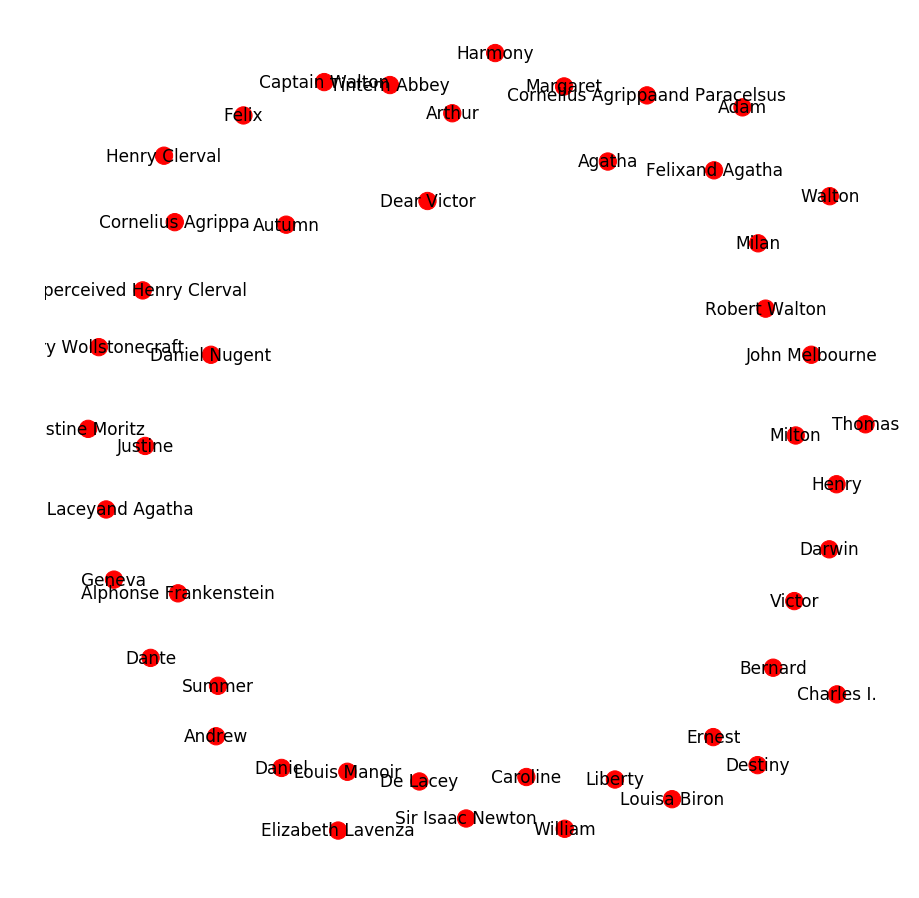

In [20]:
#plotting
import matplotlib.pyplot as plt 
import networkx as nx
import numpy as np
adjMatrix = np.array(adjMatrix)
G = nx.DiGraph()
G.add_nodes_from(character.keys())
for i in range(adjMatrix.shape[0]):
    for j in range(adjMatrix.shape[1]): 
        if adjMatrix[i][j] >= 5:  
            G.add_edge(character.keys()[i],character.keys()[j],weight=adjMatrix[i][j])

pr = nx.pagerank(G, alpha=0.85) # the default damping parameter alpha = 0.85

color_map = []
    
for char in character.keys():
    if pr[char] < 0.0036:
        G.remove_node(char)
for char in G.nodes():
    if  pr[char] > 0.01:
        color_map.append('red')
    else:
        color_map.append('yellow')

plt.figure(3,figsize=(12,12))
pos = nx.spring_layout(G,k = 1.5, iterations = 20)
nx.draw(G,with_labels=True, font_size = 17, node_color = color_map, pos = pos)

#plt.savefig("path_graph_cities.png")
plt.show()    


